## KERAS

#### importation de keras

In [1]:
from tensorflow import keras


#### import du data set de zalando fashion_mnist (compris dans tensorflow)

In [2]:
fashion_mnist=keras.datasets.fashion_mnist

In [3]:
(X_train_full, y_train_full),(X_test,y_test)=fashion_mnist.load_data()

##### Définiton de X_valid et X_train à partir de X_train_full

In [4]:
X_valid,X_train = X_train_full[:5000],X_train_full[5000:]

#### Définition de y_valid et y_train à partir de  y_train_full

In [5]:
y_valid,y_train = y_train_full[:5000], y_train_full[5000:]

#### VISUALISATION

In [6]:
X_train.shape

(55000, 28, 28)

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  44, 127,
        182, 185, 161, 120,  55,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  42, 198, 251, 255,
        251, 249, 247, 255, 252, 214, 100,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   2,   0,   0, 233, 252, 237, 239,
        234, 237, 235, 237, 237, 254, 227,   0,   0,   0,   0,   1,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0,  16, 210, 225, 215, 175,
        217, 216, 193, 196, 226, 221, 209,  50,   0,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2,   0,   0, 199, 229, 232, 230, 245, 204,
        219, 253, 245, 207, 194, 223, 231, 236, 235,   0,   0,   3,   0,
          0,   0],
       [  

In [8]:
import matplotlib.pyplot as plt

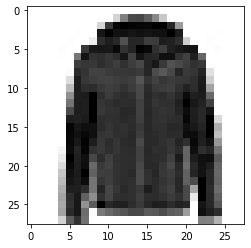

In [9]:
plt.imshow(X_train[0],cmap="binary")
plt.show()

In [10]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [11]:
class_names= ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

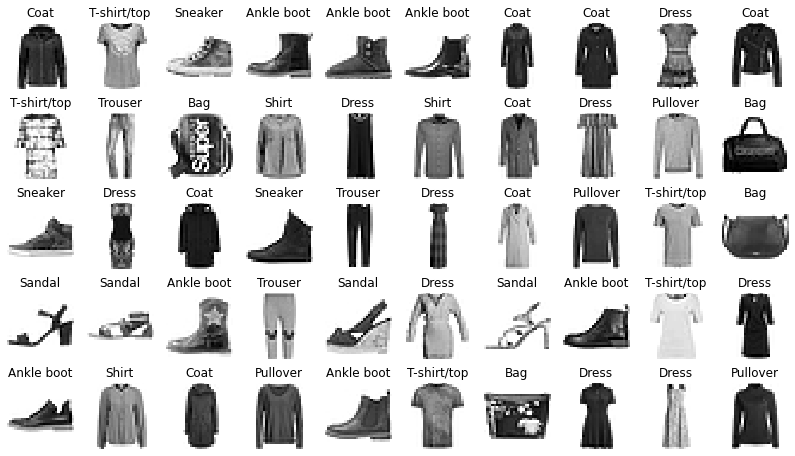

In [12]:
n_rows= 5
n_cols= 10
plt.figure(figsize=(n_cols*1.4, n_rows* 1.6))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols* row+ col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.show()

### Normalisation

In [13]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

#### Instanciation du Min Max Scaler (Mieux que le standardScaler du cours)

In [14]:
scaler = MinMaxScaler()

#### Scale du X_train reshapé pour l'occasion (au format de accepté par le scaler)

In [15]:
X_train_scaled = scaler.fit_transform(X_train.astype(np.float32).reshape(-1,1))

#### Reshape au format initial 28x28 

In [16]:
X_train_scaled = X_train_scaled.reshape(-1,28,28)

#### même chose qu'au dessus

In [17]:
X_valid_scaled= scaler.transform(X_valid.astype(np.float32).reshape(-1,1))

In [18]:
X_valid_scaled = X_valid_scaled.reshape(-1,28,28)

#### La même chose mais sur une ligne

In [19]:
X_test_scaled= scaler.transform(X_test.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)

## Instanciation

In [20]:
model = keras.models.Sequential()

In [21]:
model = keras.models.Sequential([
keras.layers.Flatten(input_shape=[28, 28]),
keras.layers.Dense(300, activation="relu"),
keras.layers.Dense(100, activation="relu"),
keras.layers.Dense(10, activation="softmax")
])

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


#### Instalation de pydot et graphviz dans le prompt

In [23]:
#%conda install graphviz

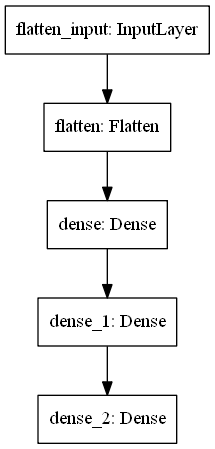

In [24]:
import pydot
import graphviz
keras.utils.plot_model(model)

### COMPILATION

In [25]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer = "sgd",
    metrics =["accuracy"])

In [26]:
import os

In [27]:
Log_dir= os.path.dirname('/')

In [28]:
callbacks = [
keras.callbacks.TensorBoard(Log_dir),
keras.callbacks.EarlyStopping(patience=5),
keras.callbacks.ModelCheckpoint("my_mnist_model.h5", save_best_only=True),
]

In [29]:
historique = model.fit(
    X_train_scaled, y_train,
    epochs=50,
    validation_data=(X_valid_scaled, y_valid),
    callbacks=callbacks
)

Epoch 1/50
1719/1719 [==============================] - 8s 4ms/step - loss: 1.0084 - accuracy: 0.6811 - val_loss: 0.4995 - val_accuracy: 0.8330
Epoch 2/50
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5090 - accuracy: 0.8240 - val_loss: 0.4702 - val_accuracy: 0.8320
Epoch 3/50
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4530 - accuracy: 0.8410 - val_loss: 0.4367 - val_accuracy: 0.8532
Epoch 4/50
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4268 - accuracy: 0.8508 - val_loss: 0.4029 - val_accuracy: 0.8640
Epoch 5/50
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4020 - accuracy: 0.8591 - val_loss: 0.3959 - val_accuracy: 0.8576
Epoch 6/50
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3858 - accuracy: 0.8648 - val_loss: 0.3713 - val_accuracy: 0.8712
Epoch 7/50
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3741 - accuracy: 0.8690 - val_loss: 0.3654 - val_accuracy:

### EVALUATION


In [30]:
model.evaluate(X_valid_scaled,y_valid)


157/157 [==============================] - 0s 2ms/step - loss: 0.2988 - accuracy: 0.8918: 0s - loss: 0.3065 - accuracy: 0.


[0.2987983524799347, 0.8917999863624573]

In [31]:
model.evaluate(X_test_scaled,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3455 - accuracy: 0.8800


[0.34548312425613403, 0.8799999952316284]

#### Courbe d'apprentissage cf pdf

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()